# 025 FBI Homicide Analysis

In [1]:
#FBI Homicide

import pandas
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#https://pandas.pydata.org/docs/user_guide/options.html
pandas.set_option('display.notebook_repr_html', True)
pandas.set_option('display.precision', 2)

In [3]:
#read in the data
totals = pandas.read_csv('totals.csv', sep='\t', index_col=0)
guns = pandas.read_csv('guns.csv', sep='\t', index_col=0)
gdp = pandas.read_csv('gdp.csv', sep='\t', index_col=1)

In [4]:
totals.head(10)

,Homicides,Total Homicides,Region,Subregion
Country,,,,
Honduras,91.6,"7,104",Americas,Central America
El Salvador,69.2,"4,308",Americas,Central America
Côte d'Ivoire,56.9,"10,801",Africa,Western Africa
Jamaica,52.2,"1,430",Americas,Caribbean
Venezuela,45.1,"13,080",Americas,South America
Belize,41.4,129,Americas,Central America
U.S. Virgin Islands,39.2,43,Americas,Caribbean
Guatemala,38.5,"5,681",Americas,Central America
Saint Kitts and Nevis,38.2,20,Americas,Caribbean


In [5]:
guns.head(10)

,Total Gun Deaths,Gun Homicides,Gun Suicides,Unintentional,Undetermined,Year,Gun Data Source
Country,,,,,,,
El Salvador,50.36,50.36,NaN,NaN,NaN,2009,OAS 2011[1]
Jamaica,47.44,47.44,NaN,NaN,NaN,2009,OAS 2011[1]
Honduras,46.70,46.70,NaN,NaN,NaN,2007,OAS 2011[1]
Guatemala,38.50,38.50,NaN,NaN,NaN,2009,OAS 2011[1]
Swaziland,37.16,37.16,NaN,NaN,NaN,2004,UNODC 2006[1]
Colombia,28.11,27.10,0.87,0.14,NaN,2009,UNODC 2011 [2]
Brazil,19.01,18.10,0.73,0.18,NaN,2008,UNODC 2011[3]
Panama,12.92,12.92,NaN,NaN,NaN,2010,OAS 2011[1]
Mexico,11.14,10.00,0.67,0.47,NaN,2010,UNODC 2011[4]


In [6]:
gdp.head(10)

,Rank,GDP,GDP Year
Country,,,
Luxembourg,1,89992,2011
Qatar,2,88919,2011
Macau,2,77607,2011
Norway,3,61882,2011
Singapore,4,61103,2011
Kuwait,5,54654,2011
Brunei,6,50506,2010
Hong Kong,6,49990,2011
Switzerland,7,49151,2011


In [7]:
#combine the 3 data frames to form a new data frame
data = totals.join(guns).join(gdp)
data.head()

,Homicides,Total Homicides,Region,Subregion,Total Gun Deaths,Gun Homicides,Gun Suicides,Unintentional,Undetermined,Year,Gun Data Source,Rank,GDP,GDP Year
Country,,,,,,,,,,,,,,
Honduras,91.6,"7,104",Americas,Central America,46.70,46.70,NaN,NaN,NaN,2007,OAS 2011[1],123.0,4066.0,2011.0
El Salvador,69.2,"4,308",Americas,Central America,50.36,50.36,NaN,NaN,NaN,2009,OAS 2011[1],98.0,6877.0,2011.0
Côte d'Ivoire,56.9,"10,801",Africa,Western Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,1803.0,2011.0
Jamaica,52.2,"1,430",Americas,Caribbean,47.44,47.44,NaN,NaN,NaN,2009,OAS 2011[1],95.0,8065.0,2011.0
Venezuela,45.1,"13,080",Americas,South America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,12836.0,2011.0


In [8]:
#create a new column
data['Gun Percent'] = 100*data['Gun Homicides'] / data['Homicides']
data.head()

,Homicides,Total Homicides,Region,Subregion,Total Gun Deaths,Gun Homicides,Gun Suicides,Unintentional,Undetermined,Year,Gun Data Source,Rank,GDP,GDP Year,Gun Percent
Country,,,,,,,,,,,,,,,
Honduras,91.6,"7,104",Americas,Central America,46.70,46.70,NaN,NaN,NaN,2007,OAS 2011[1],123.0,4066.0,2011.0,50.98
El Salvador,69.2,"4,308",Americas,Central America,50.36,50.36,NaN,NaN,NaN,2009,OAS 2011[1],98.0,6877.0,2011.0,72.77
Côte d'Ivoire,56.9,"10,801",Africa,Western Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,1803.0,2011.0,NaN
Jamaica,52.2,"1,430",Americas,Caribbean,47.44,47.44,NaN,NaN,NaN,2009,OAS 2011[1],95.0,8065.0,2011.0,90.88
Venezuela,45.1,"13,080",Americas,South America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,12836.0,2011.0,NaN


In [9]:
#delete unneeded columns
del data['Unintentional'], data['Undetermined'], data['Gun Suicides']

In [10]:
data.head()

,Homicides,Total Homicides,Region,Subregion,Total Gun Deaths,Gun Homicides,Year,Gun Data Source,Rank,GDP,GDP Year,Gun Percent
Country,,,,,,,,,,,,
Honduras,91.6,"7,104",Americas,Central America,46.70,46.70,2007,OAS 2011[1],123.0,4066.0,2011.0,50.98
El Salvador,69.2,"4,308",Americas,Central America,50.36,50.36,2009,OAS 2011[1],98.0,6877.0,2011.0,72.77
Côte d'Ivoire,56.9,"10,801",Africa,Western Africa,NaN,NaN,NaN,NaN,150.0,1803.0,2011.0,NaN
Jamaica,52.2,"1,430",Americas,Caribbean,47.44,47.44,2009,OAS 2011[1],95.0,8065.0,2011.0,90.88
Venezuela,45.1,"13,080",Americas,South America,NaN,NaN,NaN,NaN,71.0,12836.0,2011.0,NaN


In [11]:
#drop NaNs
data = data.dropna()

In [12]:
data.head()

,Homicides,Total Homicides,Region,Subregion,Total Gun Deaths,Gun Homicides,Year,Gun Data Source,Rank,GDP,GDP Year,Gun Percent
Country,,,,,,,,,,,,
Honduras,91.6,"7,104",Americas,Central America,46.70,46.70,2007,OAS 2011[1],123.0,4066.0,2011.0,50.98
El Salvador,69.2,"4,308",Americas,Central America,50.36,50.36,2009,OAS 2011[1],98.0,6877.0,2011.0,72.77
Jamaica,52.2,"1,430",Americas,Caribbean,47.44,47.44,2009,OAS 2011[1],95.0,8065.0,2011.0,90.88
Guatemala,38.5,"5,681",Americas,Central America,38.50,38.50,2009,OAS 2011[1],113.0,4961.0,2011.0,100.00
Colombia,33.4,"15,459+",Americas,South America,28.11,27.10,2009,UNODC 2011 [2],83.0,10103.0,2011.0,81.14


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
topFive = data.loc[:, ['Homicides', 'Gun Homicides']][:5]

In [15]:
topFive

,Homicides,Gun Homicides
Country,,
Honduras,91.6,46.70
El Salvador,69.2,50.36
Jamaica,52.2,47.44
Guatemala,38.5,38.50
Colombia,33.4,27.10


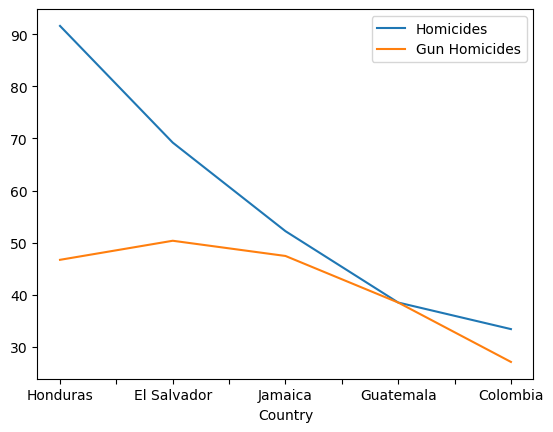

In [16]:
topFive.plot()
plt.show()

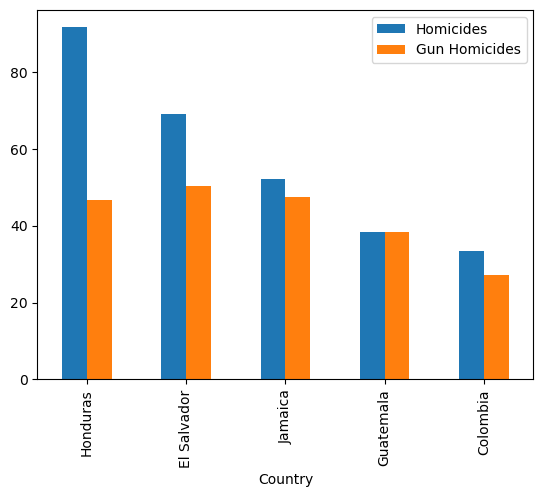

In [17]:
topFive.plot(kind='bar')
plt.show()

In [18]:
#functions
def plot_percapita(df, limit=10):
    df = df.loc[:, ['Homicides', 'Gun Homicides']][:limit]
    df['Total Homicides'] = df['Homicides'] - df['Gun Homicides']
    del df['Homicides']
    df.plot(kind='bar', stacked=True)
    plt.ylabel('Per 100k')
    plt.show()

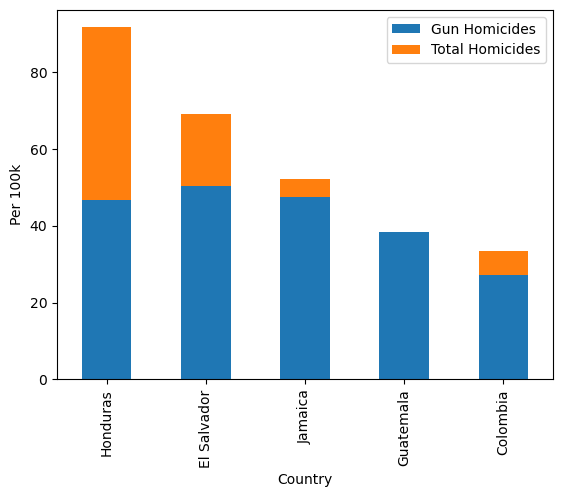

In [23]:
plot_percapita(data, 5)

In [24]:
def display_relevant(df, limit=10):
    display(df.loc[:, ['Homicides', 'Gun Homicides']][:limit])

In [25]:
display_relevant(data, 5)

,Homicides,Gun Homicides
Country,,
Honduras,91.6,46.70
El Salvador,69.2,50.36
Jamaica,52.2,47.44
Guatemala,38.5,38.50
Colombia,33.4,27.10


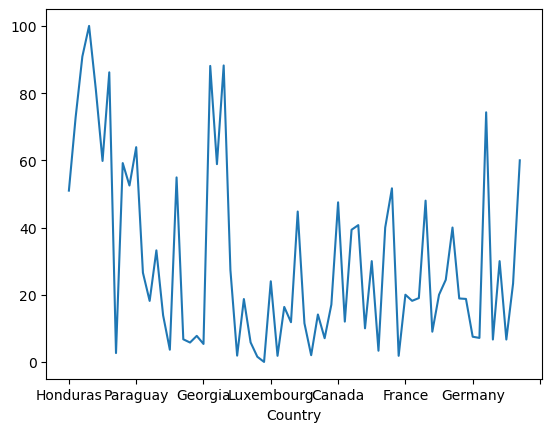

In [26]:
data['Gun Percent'].plot()
plt.show()

In [27]:
def plot_percent(df, limit=10):
    df['Gun Percent'][:limit].plot()
    plt.ylim(0, 100)
    plt.title('% Gun Homicide')
    plt.show()

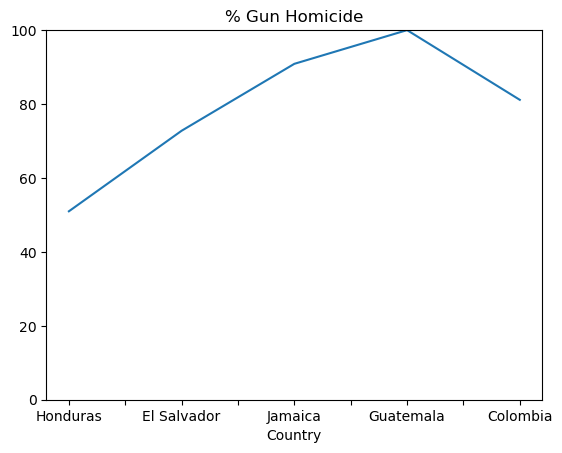

In [28]:
plot_percent(data, 5)

In [29]:
top = data.sort_values(by='GDP')
top.head()

,Homicides,Total Homicides,Region,Subregion,Total Gun Deaths,Gun Homicides,Year,Gun Data Source,Rank,GDP,GDP Year,Gun Percent
Country,,,,,,,,,,,,
Kyrgyzstan,20.1,"1,072",Asia,Central Asia,1.01,0.53,2010,WHO 2012[10],139.0,2424.0,2011.0,2.64
Nicaragua,13.6,785,Americas,Central America,7.14,7.14,2007,OAS 2011[1],132.0,2941.0,2011.0,52.50
Uzbekistan,3.1,831,Asia,Central Asia,0.68,0.58,2005,WHO 2012[10],130.0,3310.0,2011.0,18.71
Moldova,7.5,267,Europe,Eastern Europe,1.04,1.04,2011,WHO 2012[10],129.0,3392.0,2011.0,13.87
India,3.4,"40,752+",Asia,Southern Asia,0.93,0.93,2000,UNODC 2000[11],125.0,3652.0,2011.0,27.35


In [30]:
top[-30:]

,Homicides,Total Homicides,Region,Subregion,Total Gun Deaths,Gun Homicides,Year,Gun Data Source,Rank,GDP,GDP Year,Gun Percent
Country,,,,,,,,,,,,
Greece,1.5,176,Europe,Southern Europe,1.50,0.59,1994,Krug 1998[13],35.0,26948.0,2011.0,39.33
Malta,1.0,4,Europe,Southern Europe,2.16,0.48,2010,WHO 2012[10],34.0,27294.0,2011.0,48.00
Slovenia,0.7,15,Europe,Southern Europe,2.44,0.05,2010,WHO 2012[10],33.0,27412.0,2011.0,7.14
Israel,2.1,159+,Asia,Western Asia,1.86,0.94,2009,WHO 2012[10],32.0,27835.0,2011.0,44.76
New Zealand,0.9,39,Oceania,Australasia,2.66,0.17,1993,Krug 1998[13],30.0,29935.0,2010.0,18.89
South Korea,2.6,"1,251",Asia,Eastern Asia,0.13,0.04,1994,Krug 1998[13],29.0,30254.0,2011.0,1.54
Cyprus,1.7,19,Asia,Western Asia,0.83,0.24,2010,WHO 2012[10],28.0,32087.0,2011.0,14.12
Spain,0.8,390,Europe,Southern Europe,0.63,0.15,2010,WHO 2012[10],26.0,32424.0,2011.0,18.75
Italy,0.9,529,Europe,Southern Europe,1.28,0.36,2009,WHO 2012[10],25.0,32928.0,2011.0,40.00


In [31]:
top = top[-30:] #top 30 countries by GDP

In [32]:
top

,Homicides,Total Homicides,Region,Subregion,Total Gun Deaths,Gun Homicides,Year,Gun Data Source,Rank,GDP,GDP Year,Gun Percent
Country,,,,,,,,,,,,
Greece,1.5,176,Europe,Southern Europe,1.50,0.59,1994,Krug 1998[13],35.0,26948.0,2011.0,39.33
Malta,1.0,4,Europe,Southern Europe,2.16,0.48,2010,WHO 2012[10],34.0,27294.0,2011.0,48.00
Slovenia,0.7,15,Europe,Southern Europe,2.44,0.05,2010,WHO 2012[10],33.0,27412.0,2011.0,7.14
Israel,2.1,159+,Asia,Western Asia,1.86,0.94,2009,WHO 2012[10],32.0,27835.0,2011.0,44.76
New Zealand,0.9,39,Oceania,Australasia,2.66,0.17,1993,Krug 1998[13],30.0,29935.0,2010.0,18.89
South Korea,2.6,"1,251",Asia,Eastern Asia,0.13,0.04,1994,Krug 1998[13],29.0,30254.0,2011.0,1.54
Cyprus,1.7,19,Asia,Western Asia,0.83,0.24,2010,WHO 2012[10],28.0,32087.0,2011.0,14.12
Spain,0.8,390,Europe,Southern Europe,0.63,0.15,2010,WHO 2012[10],26.0,32424.0,2011.0,18.75
Italy,0.9,529,Europe,Southern Europe,1.28,0.36,2009,WHO 2012[10],25.0,32928.0,2011.0,40.00


In [33]:
top_by_guns = top.sort_values(by='Gun Homicides', ascending=False)
top_by_guns

,Homicides,Total Homicides,Region,Subregion,Total Gun Deaths,Gun Homicides,Year,Gun Data Source,Rank,GDP,GDP Year,Gun Percent
Country,,,,,,,,,,,,
United States,4.2,"12,996",Americas,Northern America,10.20,3.70,2009,OAS 2012[5][6],8.0,48442.0,2011.0,88.10
Israel,2.1,159+,Asia,Western Asia,1.86,0.94,2009,WHO 2012[10],32.0,27835.0,2011.0,44.76
Canada,1.6,554,Americas,Northern America,4.78,0.76,1992,Krug 1998[13],15.0,40440.0,2011.0,47.50
Luxembourg,2.5,12,Europe,Western Europe,1.81,0.60,2009,WHO 2012[10],1.0,89992.0,2011.0,24.00
Greece,1.5,176,Europe,Southern Europe,1.50,0.59,1994,Krug 1998[13],35.0,26948.0,2011.0,39.33
Switzerland,0.7,52,Europe,Western Europe,3.50,0.52,2010,OAS 2011[1],7.0,49151.0,2011.0,74.29
Malta,1.0,4,Europe,Southern Europe,2.16,0.48,2010,WHO 2012[10],34.0,27294.0,2011.0,48.00
Ireland,1.2,54,Europe,Northern Europe,1.03,0.36,2010,WHO 2012[10],12.0,41543.0,2011.0,30.00
Italy,0.9,529,Europe,Southern Europe,1.28,0.36,2009,WHO 2012[10],25.0,32928.0,2011.0,40.00


In [34]:
display_relevant(top_by_guns, 5)

,Homicides,Gun Homicides
Country,,
United States,4.2,3.70
Israel,2.1,0.94
Canada,1.6,0.76
Luxembourg,2.5,0.60
Greece,1.5,0.59


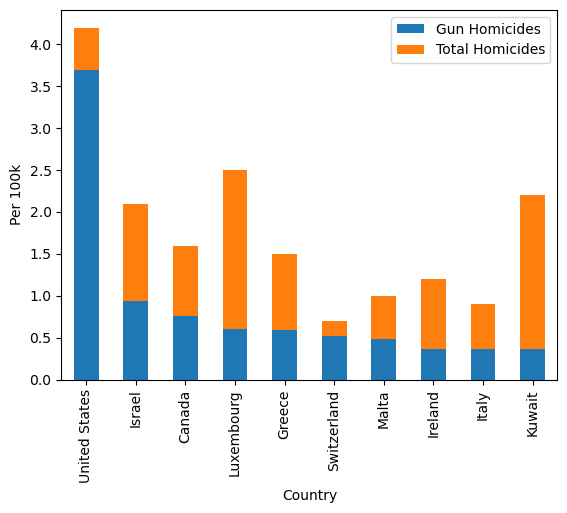

In [35]:
plot_percapita(top_by_guns, 10)